<a href="https://colab.research.google.com/github/albertofernandezvillan/ml-dl-cv-notebooks/blob/main/image_classification_keras_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using Keras Applications

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

In this example, we are going to see how to use Keras Applications from prediction.

We are going to test all pre-trained models that `tensorflow.keras.applications` provides

In [1]:
from tensorflow.keras.applications import *

Get all models from `tensorflow.keras.applications`:

In [2]:
all_models = [m for m in dir() if 
              not m.startswith('__') 
              and not m.startswith('_') 
              and not m.islower() 
              and not m=='In' 
              and not m=='Out']

In [3]:
print(all_models)

['DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'VGG16', 'VGG19', 'Xception']


In [4]:
# Import other needed packages:
from google.colab.patches import cv2_imshow
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
import cv2
import os

In [5]:
def process_image(sel_model, path_img):
  # instantiate my model using pretrained weights from imagenet:
  # notice that include_top parameter is true by default. 
  my_model = sel_model[0](include_top = True, weights='imagenet')

  img_bgr = cv2.imread(path_img)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

  # resize the image to the corresponding dimension depending on the selected model:
  img_rgb = cv2.resize(img_rgb, my_model.input_shape[1:3])

  # expand dimensions
  x = np.expand_dims(img_rgb, axis=0)

  # pre-process the input
  x = sel_model[1](x)

  # Obtain the predictions:
  preds = my_model.predict(x)

  # Decode the predictions:
  decoded_preds = sel_model[2](preds, top=3)[0]

  return img_bgr, decoded_preds

In [16]:
def show_predictions(model_name, predictions, img):
  OUTPUT_IMG_SIZE = (400, 400)
  img = cv2.resize(img, OUTPUT_IMG_SIZE).copy()

  text = "model name: {}\nlabel: {}\nprob: {:.2f}%".format(model_name, predictions[0][1], predictions[0][2] * 100)

  y0, dy = 20, 20
  for i, line in enumerate(text.split('\n')):    
    y = y0 + i * dy
    cv2.putText(img, line, (5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 1)
  
  return img

In [ ]:
# Download sample images:
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/church.jpg -O church.jpg
!wget https://raw.githubusercontent.com/albertofernandezvillan/ml-dl-cv-notebooks/main/assets/dog.jpg -O dog.jpg
!wget https://raw.githubusercontent.com/albertofernandezvillan/ml-dl-cv-notebooks/main/assets/cat.jpg -O cat.jpg

In [8]:
#Load the path of the images:
DIR_PATH = '/content'
included_extensions = ('.jpg','.jpeg', '.png')

path_images = [f for f in os.listdir(DIR_PATH) if any(f.endswith(ext) for ext in included_extensions)]

print("Loaded images: '{}'".format(path_images))

if not path_images:
  print("Please, consider downloading some images (with the required extension) before proceding further with this notebook")

Loaded images: '['church.jpg', 'cat.jpg', 'dog.jpg']'


In [9]:
MODELS = {
    'vgg16': (vgg16.VGG16, vgg16.preprocess_input, vgg16.decode_predictions),
    'vgg19': (vgg19.VGG19, vgg19.preprocess_input, vgg19.decode_predictions),
    'resnet50': (resnet_v2.ResNet50V2, resnet_v2.preprocess_input, resnet_v2.decode_predictions),
    'resnet101': (resnet_v2.ResNet101V2, resnet_v2.preprocess_input, resnet_v2.decode_predictions),
    'resnet152': (resnet_v2.ResNet152V2, resnet_v2.preprocess_input, resnet_v2.decode_predictions),
    'inception_resnet_v2': (inception_resnet_v2.InceptionResNetV2, inception_resnet_v2.preprocess_input,
                            inception_resnet_v2.decode_predictions),
    'inception_v3': (inception_v3.InceptionV3, inception_v3.preprocess_input, inception_v3.decode_predictions),    
    'mobilenet_v2': (mobilenet_v2.MobileNetV2, mobilenet_v2.preprocess_input, mobilenet_v2.decode_predictions),
    'nasnet_mobile': (nasnet.NASNetMobile, nasnet.preprocess_input, nasnet.decode_predictions),
    'nasnet_large': (nasnet.NASNetLarge, nasnet.preprocess_input, nasnet.decode_predictions),
    'densenet121': (densenet.DenseNet121, densenet.preprocess_input, densenet.decode_predictions),
    'densenet169': (densenet.DenseNet169, densenet.preprocess_input, densenet.decode_predictions),
    'densenet201': (densenet.DenseNet201, densenet.preprocess_input, densenet.decode_predictions),
    'xception': (xception.Xception, xception.preprocess_input, xception.decode_predictions),
    'efficientnet_b0': (efficientnet.EfficientNetB0, efficientnet.preprocess_input, efficientnet.decode_predictions),
    'efficientnet_b1': (efficientnet.EfficientNetB1, efficientnet.preprocess_input, efficientnet.decode_predictions),
    'efficientnet_b2': (efficientnet.EfficientNetB2, efficientnet.preprocess_input, efficientnet.decode_predictions),
    'efficientnet_b3': (efficientnet.EfficientNetB3, efficientnet.preprocess_input, efficientnet.decode_predictions),
    'efficientnet_b4': (efficientnet.EfficientNetB4, efficientnet.preprocess_input, efficientnet.decode_predictions),
    'efficientnet_b5': (efficientnet.EfficientNetB5, efficientnet.preprocess_input, efficientnet.decode_predictions),
    'efficientnet_b6': (efficientnet.EfficientNetB6, efficientnet.preprocess_input, efficientnet.decode_predictions),
    'efficientnet_b7': (efficientnet.EfficientNetB7, efficientnet.preprocess_input, efficientnet.decode_predictions)
}

In [10]:
file_selector = widgets.Dropdown(options=path_images, description='Images:')
model_selector = widgets.Dropdown(options=MODELS, description='Models:')
button = widgets.Button(description='Process', button_style='success')

In [12]:
def show_menu():
  display(model_selector)
  display(file_selector)
  display(button)

In [13]:
def on_click_button(button):

  clear_output()
  show_menu()

  # Get the path of the image to be processed:
  path_img = os.path.join(DIR_PATH, file_selector.value)

  # Get the image and the predictions:
  img_bgr, preds = process_image(model_selector.value, path_img)

  # Get the name of the selected model:
  selected_model_name = str(model_selector.value[0]).split(' ')[1]

  # Show (print) the predictions in the image:
  img_bgr_res = show_predictions(selected_model_name, preds, img_bgr)

  # Show the image:
  cv2_imshow(img_bgr_res)

In [14]:
button.on_click(on_click_button)

Dropdown(description='Models:', index=13, options={'vgg16': (<function VGG16 at 0x7efd5928a4d0>, <function pre…

Dropdown(description='Images:', index=2, options=('church.jpg', 'cat.jpg', 'dog.jpg'), value='dog.jpg')

Button(button_style='success', description='Process', style=ButtonStyle())

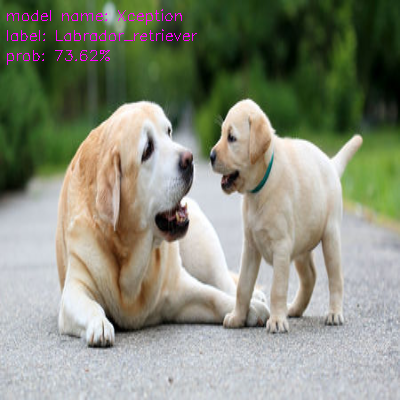

In [15]:
show_menu()